In [ ]:
!pip install -q pandas_market_calendars

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.1/196.1 kB 8.7 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd
import pandas_market_calendars as mcal
import matplotlib.pyplot as plt


In [ ]:
ticker = "WBC.AX"  # NAB stock ticker for Australian market
data = yf.download(ticker, period="3mo", interval="1d")  # Fetch data for the last 3 months
closing_prices = data['Close'].values.reshape(-1, 1)[-50:]  # Extract last 50 closing prices
dates = data.index[-50:]  # Fetching corresponding dates


[*********************100%%**********************]  1 of 1 completed


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(closing_prices)


In [ ]:
def create_sequences(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 20  # We are using 20 time steps
X, Y = create_sequences(data_normalized, time_step)
X = X[-20:]
Y = Y[-20:]
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM [samples, time steps, features]


In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, Y, epochs=100, batch_size=1)  # Adjust epochs as needed


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2059
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0908
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0706
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0319
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0524
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0505
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0391
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0525
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0322
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0344
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0512
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0642
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0792
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0291
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0351
Epoch 16/1

In [ ]:
predicted_prices = []
current_sequence = data_normalized[-time_step:]

for _ in range(10):
    current_sequence = current_sequence.reshape(1, time_step, 1)
    predicted_value = model.predict(current_sequence)
    predicted_prices.append(predicted_value[0][0])

    # Update the current sequence with the predicted value
    current_sequence = np.append(current_sequence[0][1:], predicted_value)
    current_sequence = current_sequence.reshape(time_step, 1)

predicted_prices = np.array(predicted_prices).reshape(-1, 1)
predicted_prices = scaler.inverse_transform(predicted_prices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [ ]:
aus_cal = mcal.get_calendar('ASX')  # Australian Stock Exchange calendar
schedule = aus_cal.schedule(start_date=dates[-1], end_date=dates[-1] + pd.DateOffset(days=20))
next_10_trading_dates = schedule.index[1:11]  # The next 10 trading dates
closing_prices_flat = closing_prices.flatten()
closing_prices_series = pd.Series(closing_prices_flat)
dates_series = pd.to_datetime(dates)


In [ ]:
support = closing_prices_series.rolling(window=10).min().iloc[-1]  # Last 10 days
resistance = closing_prices_series.rolling(window=10).max().iloc[-1]  # Last 10 days


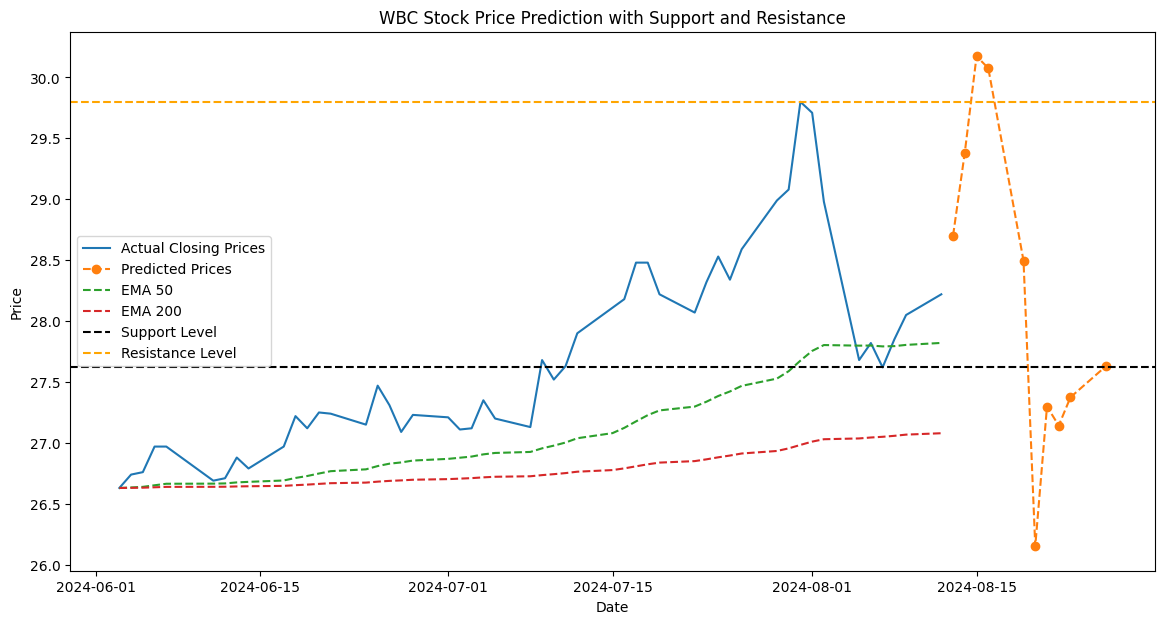

In [ ]:
plt.figure(figsize=(14, 7))

# Plot actual closing prices
plt.plot(dates, closing_prices, label="Actual Closing Prices")

# Plot predicted prices
plt.plot(next_10_trading_dates, predicted_prices, label="Predicted Prices", linestyle='dashed', marker='o')

# Calculate EMAs
ema_50 = closing_prices_series.ewm(span=50, adjust=False).mean()
ema_200 = closing_prices_series.ewm(span=200, adjust=False).mean()

# Plot EMAs
plt.plot(dates_series, ema_50, label="EMA 50", linestyle='--')
plt.plot(dates_series, ema_200, label="EMA 200", linestyle='--')

# Plot Support and Resistance lines
plt.axhline(y=support, color='black', linestyle='--', label="Support Level")
plt.axhline(y=resistance, color='orange', linestyle='--', label="Resistance Level")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"WBC Stock Price Prediction with Support and Resistance")
plt.legend()

plt.show()


In [ ]:
true_values_last_10 = data['Close'].values[-10:]  # Actual closing prices for the last 10 days
predicted_values_last_10 = predicted_prices.flatten()[-10:]  # Flatten predicted prices for last 10 days

mae = np.mean(np.abs(true_values_last_10 - predicted_values_last_10))
rmse = np.sqrt(np.mean((true_values_last_10 - predicted_values_last_10)**2))

print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

print("\nLast 10 Trading Day Share Prices:")
print(data['Close'].tail(10))

print("\nLast 10 Predicted Prices:")
for date, price in zip(next_10_trading_dates, predicted_prices[-10:]):
    print(f"{date.date()}: {price[0]}")

print("\nPredicted Next 10 Trading Day Share Prices:")
for date, price in zip(next_10_trading_dates, predicted_prices):
    print(f"{date.date()}: {price[0]}")



Model Evaluation:
Mean Absolute Error (MAE): 2.270644950866699
Root Mean Squared Error (RMSE): 2.3373261190613155

Last 10 Trading Day Share Prices:
Date
2024-07-18    28.480000
2024-07-19    28.219999
2024-07-22    28.070000
2024-07-23    28.320000
2024-07-24    28.530001
2024-07-25    28.340000
2024-07-26    28.590000
2024-07-29    28.990000
2024-07-30    29.080000
2024-07-31    29.799999
Name: Close, dtype: float64

Last 10 Predicted Prices:
2024-08-01: 30.10293960571289
2024-08-02: 30.622093200683594
2024-08-05: 31.066059112548828
2024-08-06: 31.310073852539062
2024-08-07: 31.311071395874023
2024-08-08: 31.063419342041016
2024-08-09: 30.77088165283203
2024-08-12: 30.677978515625
2024-08-13: 30.874252319335938
2024-08-14: 31.327678680419922

Predicted Next 10 Trading Day Share Prices:
2024-08-01: 30.10293960571289
2024-08-02: 30.622093200683594
2024-08-05: 31.066059112548828
2024-08-06: 31.310073852539062
2024-08-07: 31.311071395874023
2024-08-08: 31.063419342041016
2024-08-09: 30.